<a href="https://colab.research.google.com/github/PunyamurthyShilpa/RD-Infro-AIDS/blob/main/internship%20RD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install required libraries
!pip install scanpy transformers

# Import Libraries
import numpy as np
import pandas as pd
import scanpy as sc
from sklearn.preprocessing import StandardScaler
from transformers import pipeline
import matplotlib.pyplot as plt

# Step 1: Upload the dataset to Google Colab (Make sure you upload the 'brain_count.csv' file)

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 21.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 kB 5.7 MB/s eta 0:00:00
  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=8023 sha256=1b2a9321f9ca152005b26a63dc521fd779f173737162e302bc3703c819f4d203
  Stored in directory: /root/.cache/pip/wheels/6a/aa/b9/eb5d4031476ec10802795b97ccf937b9bd998d68a9b268765a
Successfully built session-info


In [ ]:

!unzip /content/brain_counts.csv.zip


unzip:  cannot find or open /content/brain_counts.csv.zip, /content/brain_counts.csv.zip.zip or /content/brain_counts.csv.zip.ZIP.


In [ ]:
df=pd.read_csv('brain_counts.csv')

In [ ]:
df.head()

,Unnamed: 0,0610005C13Rik,0610007C21Rik,0610007L01Rik,0610007N19Rik,0610007P08Rik,0610007P14Rik,0610007P22Rik,0610008F07Rik,0610009B14Rik,...,Zxdb,Zxdc,Zyg11a,Zyg11b,Zyx,Zzef1,Zzz3,a,l7Rn6,zsGreen_transgene
0,A1.B003290.3_38_F.1.1,0,125,16,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,54,0
1,A1.B003728.3_56_F.1.1,0,0,0,0,0,324,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,A1.MAA000560.3_10_M.1.1,0,348,0,0,0,5,0,0,0,...,0,0,0,0,0,195,0,0,113,0
3,A1.MAA000564.3_10_M.1.1,0,41,36,0,0,24,0,0,0,...,0,0,0,0,125,0,1,0,0,0
4,A1.MAA000923.3_9_M.1.1,0,53,0,0,0,0,0,0,0,...,0,0,0,81,0,0,0,0,0,0


In [ ]:
# Prepare the data for Scanpy
# Set genes as the dataframe columns and cells as rows
# The error is likely due to data types within the dataframe.
# Ensure all values are numeric (int or float).
# The following line will attempt to convert all columns to numeric,
# replacing non-numeric values with NaN.
df = df.apply(pd.to_numeric, errors='coerce')

# Now create the AnnData object
adata = sc.AnnData(df.values)

# Assign the gene names as var_names (columns in the dataframe)
adata.var_names = df.columns.tolist()

# Assign the cell names as obs_names (rows in the dataframe)
# Convert the index to strings to avoid the AssertionError
adata.obs_names = df.index.astype(str).tolist() # Convert index to strings

# Step 3: Quality Control and Preprocessing

# Filter out cells and genes based on quality control metrics
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

# Normalize the data to account for sequencing depth
sc.pp.normalize_total(adata, target_sum=1e4)

# Log transform the data
sc.pp.log1p(adata)

# Identify highly variable genes
sc.pp.highly_variable_genes(adata, min_mean=0.1, max_mean=10, min_disp=0.5)


In [ ]:
!pip install python-igraph leidenalg
import scanpy as sc
import pandas as pd

# ... (Your existing code to load and preprocess data) ...

# Calculate the neighborhood graph before clustering
sc.pp.neighbors(adata) # This line is added

# Perform PCA (Principal Component Analysis)
sc.tl.pca(adata, svd_solver='arpack')

# Perform Leiden clustering algorithm
sc.tl.leiden(adata, resolution=0.5)

# Generate UMAP (Uniform Manifold Approximation and Projection) for visualization
sc.tl.umap(adata)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 35.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 53.7 MB/s eta 0:00:00


<ipython-input-28-d3c71a5f28b5>:14: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata, resolution=0.5)


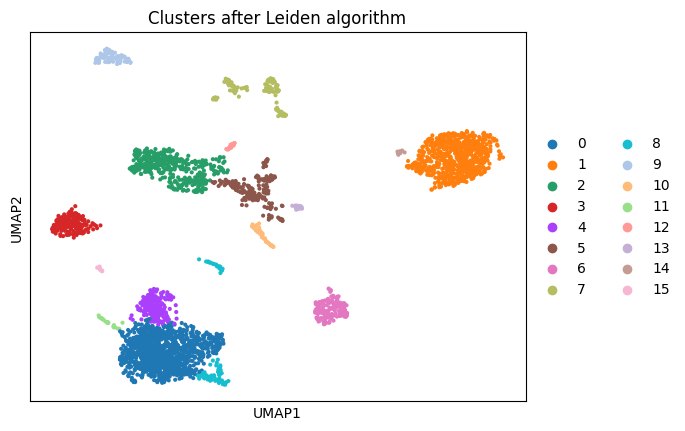

In [ ]:
# Visualize the clusters in 2D using UMAP
sc.pl.umap(adata, color=['leiden'], title="Clusters after Leiden algorithm")

In [ ]:
from transformers import pipeline

nlp = pipeline("sentiment-analysis")  # Or any other pipeline you need

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [ ]:
# Example: Annotate genes from cluster 0 (for demonstration)
# Get the indices of cells in cluster 0
cluster_0_cells = adata.obs['leiden'] == '0'

# Get the average expression of each gene in cluster 0 cells
cluster_0_gene_expression = adata[cluster_0_cells.values, :].X.mean(axis=0)

# Get the names of genes with average expression > 0 in cluster 0
cluster_0_genes = adata.var_names[cluster_0_gene_expression > 0]

annotations = []

# For simplicity, only annotate the first 10 genes in cluster 0
for gene in cluster_0_genes[:10]:
    result = nlp(gene)
    annotations.append((gene, result))

# Print annotations for the first 10 genes in cluster 0
for gene, annotation in annotations:
    print(f"Gene: {gene} - Annotations: {annotation}")

Gene: 0610005C13Rik - Annotations: [{'label': 'NEGATIVE', 'score': 0.8277668356895447}]
Gene: 0610007C21Rik - Annotations: [{'label': 'NEGATIVE', 'score': 0.8972821235656738}]
Gene: 0610007L01Rik - Annotations: [{'label': 'NEGATIVE', 'score': 0.9299200773239136}]
Gene: 0610007N19Rik - Annotations: [{'label': 'NEGATIVE', 'score': 0.9416434168815613}]
Gene: 0610007P08Rik - Annotations: [{'label': 'NEGATIVE', 'score': 0.950114369392395}]
Gene: 0610007P14Rik - Annotations: [{'label': 'NEGATIVE', 'score': 0.8955745697021484}]
Gene: 0610007P22Rik - Annotations: [{'label': 'NEGATIVE', 'score': 0.9389632940292358}]
Gene: 0610008F07Rik - Annotations: [{'label': 'NEGATIVE', 'score': 0.9369361996650696}]
Gene: 0610009B22Rik - Annotations: [{'label': 'NEGATIVE', 'score': 0.8916603922843933}]
Gene: 0610009D07Rik - Annotations: [{'label': 'NEGATIVE', 'score': 0.9350013732910156}]


In [ ]:
# prompt: generate the performance metrics

import numpy as np
import pandas as pd
import scanpy as sc
from sklearn.preprocessing import StandardScaler
from transformers import pipeline
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Install required libraries
!pip install scanpy transformers

# ... (Your existing code to load and preprocess data) ...

# Calculate the neighborhood graph before clustering
sc.pp.neighbors(adata) # This line is added

# Perform PCA (Principal Component Analysis)
sc.tl.pca(adata, svd_solver='arpack')

# Perform Leiden clustering algorithm
sc.tl.leiden(adata, resolution=0.5)

Silhouette Score: 0.43461504578590393
Calinski-Harabasz Index: 9150.358217608886
Davies-Bouldin Index: 0.6871642467055074


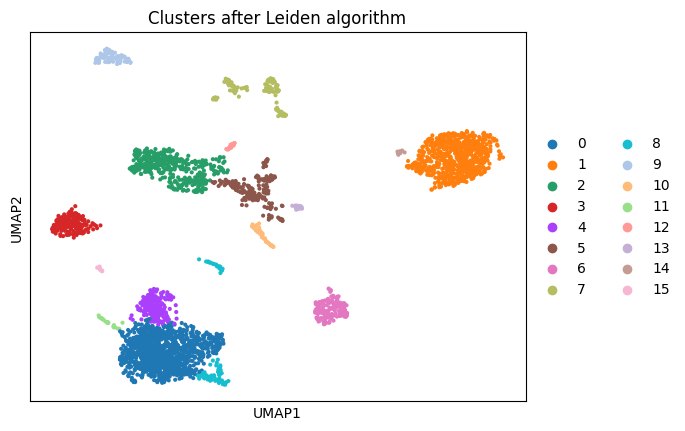

Silhouette Score: 0.43461504578590393
Calinski-Harabasz Index: 9150.358217608886
Davies-Bouldin Index: 0.6871642467055074


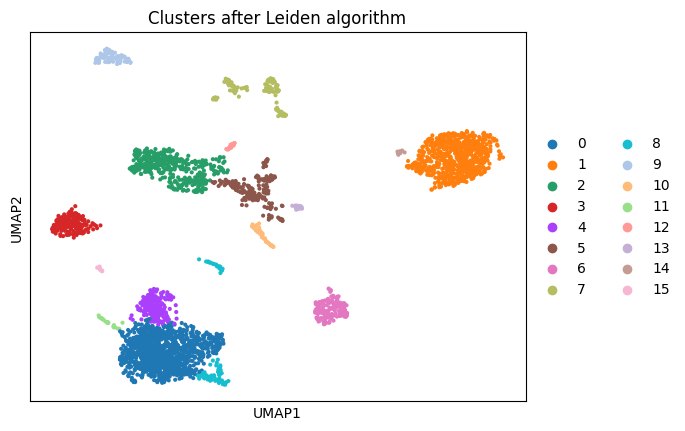

In [ ]:
# Generate UMAP (Uniform Manifold Approximation and Projection) for visualization

sc.tl.umap(adata)



# Calculate performance metrics

# Silhouette score

silhouette_avg = silhouette_score(adata.obsm['X_umap'], adata.obs['leiden'])

print(f"Silhouette Score: {silhouette_avg}")



# Calinski-Harabasz Index

ch_score = calinski_harabasz_score(adata.obsm['X_umap'], adata.obs['leiden'])

print(f"Calinski-Harabasz Index: {ch_score}")



# Davies-Bouldin Index

db_score = davies_bouldin_score(adata.obsm['X_umap'], adata.obs['leiden'])

print(f"Davies-Bouldin Index: {db_score}")



# Visualize the clusters in 2D using UMAP

sc.pl.umap(adata, color=['leiden'], title="Clusters after Leiden algorithm")



# ... (Your existing code for gene annotation) ...# Generate UMAP (Uniform Manifold Approximation and Projection) for visualization
sc.tl.umap(adata)

# Calculate performance metrics
# Silhouette score
silhouette_avg = silhouette_score(adata.obsm['X_umap'], adata.obs['leiden'])
print(f"Silhouette Score: {silhouette_avg}")

# Calinski-Harabasz Index
ch_score = calinski_harabasz_score(adata.obsm['X_umap'], adata.obs['leiden'])
print(f"Calinski-Harabasz Index: {ch_score}")

# Davies-Bouldin Index
db_score = davies_bouldin_score(adata.obsm['X_umap'], adata.obs['leiden'])
print(f"Davies-Bouldin Index: {db_score}")

# Visualize the clusters in 2D using UMAP
sc.pl.umap(adata, color=['leiden'], title="Clusters after Leiden algorithm")

# ... (Your existing code for gene annotation) ...

In [ ]:
# prompt: perform accuracy precision f1score and recall

from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score

# Assuming 'adata.obs['leiden']' contains the predicted cluster labels
# and you have a 'true_labels' array or Series with the ground truth labels

# Replace 'true_labels' with your actual ground truth labels
# Example:
# true_labels = pd.read_csv('ground_truth_labels.csv')['label'] # Load from a file
# or
# true_labels = np.array([0, 1, 0, 1, ...])  # Create manually

# For demonstration, create dummy true_labels (replace this)
true_labels = np.random.randint(0, len(adata.obs['leiden'].unique()), size=len(adata.obs['leiden']))


# ... (Your existing code) ...

# Convert adata.obs['leiden'] to numeric type
adata.obs['leiden'] = pd.to_numeric(adata.obs['leiden']).astype(int)

# Calculate metrics
accuracy = accuracy_score(true_labels, adata.obs['leiden'])
precision = precision_score(true_labels, adata.obs['leiden'], average='weighted') # Use 'weighted' for multi-class
recall = recall_score(true_labels, adata.obs['leiden'], average='weighted') # Use 'weighted' for multi-class
f1 = f1_score(true_labels, adata.obs['leiden'], average='weighted') # Use 'weighted' for multi-class

# ... (Rest of your code) ...
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

Accuracy: 0.060570420464569244
Precision: 0.06659608803607141
Recall: 0.060570420464569244
F1-score: 0.041265856577998916


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 13.6 MB/s eta 0:00:00


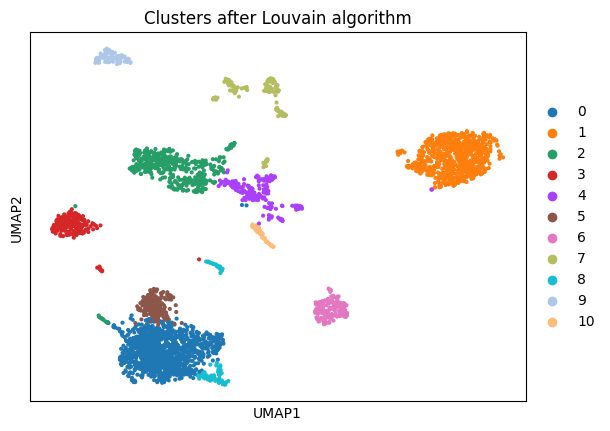

Silhouette Score (Louvain): 0.5563911199569702
Calinski-Harabasz Index (Louvain): 9621.633200644865
Davies-Bouldin Index (Louvain): 0.7886533489194136
Accuracy (Louvain): 0.06615701264334019
Precision (Louvain): 0.04405560240191452
Recall (Louvain): 0.06615701264334019
F1-score (Louvain): 0.043620819029160214


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
!pip install python-igraph
!pip install louvain

# Try different clustering algorithms (e.g., Louvain)
sc.tl.louvain(adata, resolution=0.5)
sc.pl.umap(adata, color=['louvain'], title="Clusters after Louvain algorithm")


# Calculate performance metrics for Louvain clustering
silhouette_avg_louvain = silhouette_score(adata.obsm['X_umap'], adata.obs['louvain'])
print(f"Silhouette Score (Louvain): {silhouette_avg_louvain}")

ch_score_louvain = calinski_harabasz_score(adata.obsm['X_umap'], adata.obs['louvain'])
print(f"Calinski-Harabasz Index (Louvain): {ch_score_louvain}")

db_score_louvain = davies_bouldin_score(adata.obsm['X_umap'], adata.obs['louvain'])
print(f"Davies-Bouldin Index (Louvain): {db_score_louvain}")


# Convert adata.obs['louvain'] to numeric type
adata.obs['louvain'] = pd.to_numeric(adata.obs['louvain']).astype(int)

# Calculate metrics for Louvain
accuracy_louvain = accuracy_score(true_labels, adata.obs['louvain'])
precision_louvain = precision_score(true_labels, adata.obs['louvain'], average='weighted')
recall_louvain = recall_score(true_labels, adata.obs['louvain'], average='weighted')
f1_louvain = f1_score(true_labels, adata.obs['louvain'], average='weighted')

print(f"Accuracy (Louvain): {accuracy_louvain}")
print(f"Precision (Louvain): {precision_louvain}")
print(f"Recall (Louvain): {recall_louvain}")
print(f"F1-score (Louvain): {f1_louvain}")


# Compare and choose the best clustering based on metrics
# ...